# Installs and Imports

In [28]:
pip install torch torchvision numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import tifffile as tiff
import imagecodecs
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from scipy import ndimage
from scipy.ndimage import sobel
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Read & Preprocess Files

In [2]:
def normalize_image(image):
    """
    Normalize pixel values to [0, 1].

    Parameters:
        image (numpy.ndarray): Input image.

    Returns:
        numpy.ndarray: Normalized image.
    """
    img_gray = rgb2gray(image)
    return (img_gray - np.min(img_gray)) / (np.max(img_gray) - np.min(img_gray))

def display_image(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.colorbar()
    plt.show()

In [106]:
def normalize_all_tiff(raw_directory, norm_directory, raw_label_directory, label_directory):
    # Ensure the normalized directory exists
    if not os.path.exists(norm_directory):
        os.makedirs(norm_directory)
        print(f"Created directory for normalized images: {norm_directory}")
        
    if not os.path.exists(label_directory):
        os.makedirs(label_directory)
        print(f"Created directory for image labels: {label_directory}")
    
    # Loop through all files in the raw images directory
    for filename in os.listdir(raw_directory):
        # Check if the file is a TIFF image
        if filename.lower().endswith('.tif') or filename.lower().endswith('.tiff'):
            # Create a new filename with the suffix "NORM"
            # base, ext = os.path.splitext(filename)
            new_filename = filename
            new_file_path = os.path.join(norm_directory, new_filename)
            
            # Check if the normalized file already exists
            if os.path.exists(new_file_path):
                print(f"Normalized file already exists: {new_filename}")
                continue  # Skip this file if the normalized version already exists
            
            # Construct the full file path of the original file
            file_path = os.path.join(raw_directory, filename)
            
            # Read the TIFF image
            image = tiff.imread(file_path)
            
            # Normalize the image
            normalized_image = normalize_image(image)
            
            # Save the normalized image to the normalized directory
            tiff.imsave(new_file_path, normalized_image)
            print(f"Normalized image saved as: {new_filename}")
            
    for filename in os.listdir(raw_label_directory):
        # Check if the file is a TIFF image
        if filename.lower().endswith('.tif') or filename.lower().endswith('.tiff'):
            new_filename = filename
            new_file_path = os.path.join(label_directory, new_filename)
            
            # Check if the normalized file already exists
            if os.path.exists(new_file_path):
                print(f"Image label already exists: {new_filename}")
                continue  # Skip this file if the normalized version already exists
            
            # Construct the full file path of the original file
            file_path = os.path.join(raw_label_directory, filename)
            
            # Read the TIFF image
            image = tiff.imread(file_path)
            
            # Normalize the labels
            normalized_image = normalize_image(image)
            
            # Save the normalized labels to the normalized label directory
            tiff.imsave(new_file_path, normalized_image)
            print(f"Image label saved as: {new_filename}")

Tiff Shape:  (515, 515)
Tiff Values:  [[223 231 219 ... 210 214 223]
 [229 233 234 ... 219 224 229]
 [224 233 234 ... 212 214 224]
 ...
 [197 178 162 ... 219 215 197]
 [217 230 204 ... 202 204 217]
 [223 231 219 ... 210 214 223]]


<ipython-input-4-94b58cf0b10e>:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_gray = rgb2gray(img) # confirm greyscale
<ipython-input-2-fa7a96c5241f>:11: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_gray = rgb2gray(image)


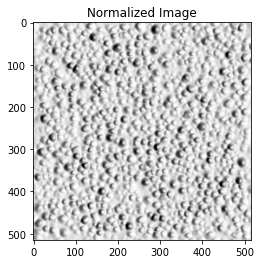

In [4]:
# Test read a TIFF file
tiff_name = 'new03a071.tif' # replace with your test file name
img = tiff.imread(tiff_name)
img_gray = rgb2gray(img) # confirm greyscale

# Confirm dimensions of image array and existence of values in image array
print("Tiff Shape: ", img.shape)
print("Tiff Values: ", img)

# Normalize greyscale image
img_norm = normalize_image(img_gray)

# Plot normalized image
plt.figure()
plt.title('Normalized Image')
plt.imshow(img_norm, cmap='gray')

In [108]:
# Normalize and save all TIFF files in the dataset
directory = "RawPits"
norm_dir = "NormPits"
label_dir = "NormLabels"
raw_labels = "RawLabels"
normalize_all_tiff(directory, norm_dir, raw_labels, label_dir)

Created directory for image labels: NormLabels
Normalized file already exists: hole_mx41_my24_slope28_el27_az311_xrad1392_yrad699.tif
Normalized file already exists: hole_mx38_my23_slope21_el53_az267_xrad1281_yrad950.tif
Normalized file already exists: hole_mx47_my51_slope28_el54_az90_xrad1059_yrad1221.tif
Normalized file already exists: hole_mx45_my40_slope37_el30_az49_xrad1014_yrad1495.tif
Normalized file already exists: hole_mx45_my29_slope39_el42_az99_xrad1038_yrad1040.tif
Normalized file already exists: hole_mx42_my43_slope18_el30_az279_xrad1117_yrad724.tif
Normalized file already exists: hole_mx49_my45_slope29_el61_az260_xrad1452_yrad1089.tif
Normalized file already exists: hole_mx57_my35_slope38_el24_az123_xrad1151_yrad632.tif
Normalized file already exists: hole_mx26_my58_slope33_el69_az294_xrad1092_yrad1022.tif
Normalized file already exists: hole_mx51_my51_slope20_el25_az45_xrad1250_yrad1250.tif
Normalized file already exists: hole_mx24_my36_slope12_el24_az78_xrad895_yrad826.

Image label saved as: hole_mx34_my27_slope12_el26_az157_xrad1046_yrad1173.tif
Image label saved as: hole_mx51_my53_slope29_el38_az258_xrad911_yrad718.tif
Image label saved as: hole_mx58_my26_slope24_el52_az293_xrad1317_yrad667.tif
Image label saved as: hole_mx43_my24_slope17_el22_az270_xrad803_yrad1405.tif
Image label saved as: hole_mx40_my30_slope42_el62_az19_xrad1025_yrad909.tif
Image label saved as: hole_mx57_my26_slope6_el32_az170_xrad1196_yrad1025.tif
Image label saved as: hole_mx46_my28_slope35_el36_az117_xrad1316_yrad577.tif
Image label saved as: hole_mx27_my55_slope29_el40_az265_xrad571_yrad696.tif
Image label saved as: hole_mx46_my30_slope17_el74_az246_xrad1060_yrad1489.tif
Image label saved as: hole_mx55_my21_slope22_el38_az230_xrad696_yrad1314.tif
Image label saved as: hole_mx21_my52_slope39_el69_az280_xrad733_yrad841.tif
Image label saved as: hole_mx33_my21_slope5_el48_az257_xrad1251_yrad794.tif
Image label saved as: hole_mx24_my47_slope37_el62_az265_xrad1349_yrad1017.tif
I

Image label saved as: hole_mx59_my54_slope7_el34_az71_xrad1306_yrad682.tif
Image label saved as: hole_mx21_my31_slope16_el70_az161_xrad1101_yrad560.tif
Image label saved as: hole_mx40_my59_slope28_el60_az246_xrad1049_yrad1170.tif
Image label saved as: hole_mx58_my46_slope23_el62_az11_xrad1380_yrad567.tif
Image label saved as: hole_mx48_my29_slope41_el24_az20_xrad1429_yrad786.tif
Image label saved as: hole_mx31_my42_slope6_el59_az329_xrad700_yrad1477.tif
Image label saved as: hole_mx56_my42_slope23_el22_az222_xrad511_yrad981.tif
Image label saved as: hole_mx58_my27_slope12_el47_az93_xrad541_yrad817.tif
Image label saved as: hole_mx46_my33_slope38_el70_az204_xrad1109_yrad998.tif
Image label saved as: hole_mx37_my20_slope19_el39_az358_xrad1087_yrad823.tif
Image label saved as: hole_mx58_my27_slope16_el28_az114_xrad994_yrad851.tif
Image label saved as: hole_mx30_my41_slope41_el55_az72_xrad966_yrad716.tif
Image label saved as: hole_mx30_my45_slope7_el28_az219_xrad873_yrad811.tif
Image label

# Data Split

In [109]:
def split_tiff_dataset(directory, train_size=0.8):
    """
    Split a directory of TIFF files into training and validation sets.

    Parameters:
    - directory (str): Path to the directory containing TIFF files.
    - train_size (float): The proportion of the dataset to include in the train split.

    Returns:
    - train_files (list): Paths of TIFF files in the training dataset.
    - val_files (list): Paths of TIFF files in the validation dataset.
    """
    # List all TIFF files in the directory
    files = [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith('.tif') or f.lower().endswith('.tiff')]
    
    # Shuffle the list of files to ensure random splitting
    np.random.shuffle(files)
    
    # Calculate the index for splitting
    split_idx = int(len(files) * train_size)
    
    # Split the files into training and validation sets
    train_files = files[:split_idx]
    val_files = files[split_idx:]
    
    return train_files, val_files

In [110]:
train_set, temp_set = split_tiff_dataset(norm_dir, train_size=0.8)

ten_percent = int(len(temp_set) / 2)

valid_set = temp_set[:ten_percent]
test_set = temp_set[ten_percent:]

print (len(train_set), len(valid_set), len(test_set))

121 15 16


# Build and Load Model

In [124]:
# Define & build model
class DoubleConv(nn.Module):
    """(convolution => [BN] => ReLU) * 2"""

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

class UNet(nn.Module):
    def __init__(self, input_channels=1, output_channels=1):  # Assuming 1 input channel and 1 output channel for segmentation masks
        super(UNet, self).__init__()
        self.down1 = DoubleConv(input_channels, 64)
        self.down2 = DoubleConv(64, 128)
        self.down3 = DoubleConv(128, 256)
        self.down4 = DoubleConv(256, 512)
        self.maxpool = nn.MaxPool2d(2)
        self.up1 = nn.ConvTranspose2d(512, 256, 2, stride=2)
        self.conv1 = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, 2, stride=2)
        self.conv2 = DoubleConv(256, 128)
        self.up3 = nn.ConvTranspose2d(128, 64, 2, stride=2)
        self.conv3 = DoubleConv(128, 64)
        self.conv_final = nn.Conv2d(64, output_channels, 1)

    def forward(self, x):
        x1 = self.down1(x)
        x2 = self.down2(self.maxpool(x1))
        x3 = self.down3(self.maxpool(x2))
        x4 = self.down4(self.maxpool(x3))
        x = self.up1(x4)
        x = self.conv1(torch.cat([x, x3], dim=1))
        x = self.up2(x)
        x = self.conv2(torch.cat([x, x2], dim=1))
        x = self.up3(x)
        x = self.conv3(torch.cat([x, x1], dim=1))
        x = self.conv_final(x)
        return x


In [125]:
# General combo loss function
class ComboLoss(nn.Module):
    def __init__(self, alpha=0.5, beta=0.5):
        super(ComboLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.dice_loss = DiceLoss()
        self.bce_loss = torch.nn.BCEWithLogitsLoss()

    def forward(self, inputs, targets):
        return self.alpha * self.dice_loss(inputs, targets) + self.beta * self.bce_loss(inputs, targets)

In [126]:
# Dataset loader
class PitDataset(Dataset):
    def __init__(self, data_dir, labels_dir, transform=None, target_transform=None):
        """
        Args:
            data_dir (string): Directory with all the data images.
            labels_dir (string): Directory with all the label images.
            transform (callable, optional): Transform to be applied on a sample.
            target_transform (callable, optional): Transform to be applied on the target (label).
        """
        self.data_dir = data_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.target_transform = target_transform
        self.data_filenames = [f for f in os.listdir(data_dir) if f.endswith('.tif') or f.endswith('.tiff')]
    
    def __len__(self):
        return len(self.data_filenames)

    def __getitem__(self, idx):
        # Load data image 
        data_img_path = os.path.join(self.data_dir, self.data_filenames[idx])
        label_img_path = os.path.join(self.labels_dir, self.data_filenames[idx])

        # Load and convert images
        data_image = tiff.imread(data_img_path).astype(np.float32)  # Convert numpy array to float32
        label_image = tiff.imread(label_img_path).astype(np.float32)  # Convert numpy array to float32
        # print(data_img_path, label_img_path) # to confirm labels and data are matching correctly

        # Apply transformations to data and label images if any
        if self.transform:
            data_image = self.transform(data_image)
        if self.target_transform:
            label_image = self.target_transform(label_image)

        return data_image, label_image

# Validate Data Loader Output as needed
# for images, labels in dataloader:
#     print(type(images), images.shape)  # This should print <class 'torch.Tensor'> and the shape
#     outputs = unet_model(images)  # Ensure images are passed as input

In [127]:
# Transformations for the data images
data_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Resize for consistent image size
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.float()),  # Ensure tensor is float32
])

# Transformations for the label images
label_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Ensure label image is same size as data image
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.float()),  # Ensure tensor is float32
])

In [128]:
# Usage
data_dir = norm_dir
labels_dir = label_dir
dataset = PitDataset(data_dir, labels_dir, transform=data_transform, target_transform=label_transform)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

data, labels = next(iter(dataloader))
print(data.dtype, labels.dtype)  # Should output torch.float32 for both

torch.float32 torch.float32


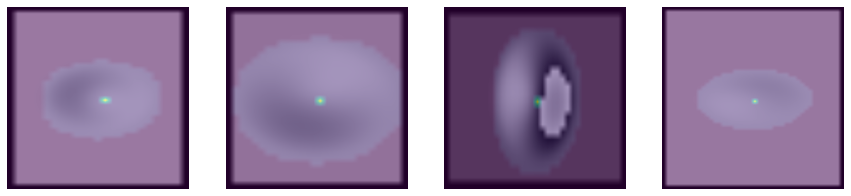

In [129]:
# Function to display images
# Check to make sure everything's aligned before continuing
def show_images(images, labels, num_images=4):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        ax = axes[i]
        img = images[i].permute(1, 2, 0)  # Convert from CxHxW to HxWxC for plotting
        lbl = labels[i].permute(1, 2, 0)
        ax.imshow(img[:, :, 0], cmap='gray')  # Show greyscale image
        ax.imshow(lbl, alpha=0.5)  # Overlay label with transparency
        ax.axis('off')
    plt.show()

# Load one batch of data
data, labels = next(iter(dataloader))
show_images(data, labels)


In [132]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet_model = UNet().to(device)

for images, labels in dataloader:
    images, labels = images.to(device), labels.to(device)
    outputs = unet_model(images)

In [133]:
print(outputs)

tensor([[[[-1.9393e-01,  9.1154e-01,  4.1137e-01,  ...,  5.1697e-01,
           -1.3628e-01, -1.1160e-02],
          [-1.2125e-01,  4.1351e-01, -5.6182e-01,  ..., -2.3255e-01,
           -1.4446e+00, -3.6673e-01],
          [ 4.8056e-02,  4.3306e-01, -4.3828e-01,  ...,  5.7946e-01,
           -9.4735e-01, -7.1169e-02],
          ...,
          [-9.1151e-01,  1.6107e-01, -4.4635e-01,  ...,  3.6306e-02,
           -9.1888e-01, -8.8766e-01],
          [-2.2558e-01, -1.6965e-01, -1.7049e+00,  ..., -2.4659e-01,
           -1.3686e+00, -5.8880e-01],
          [-5.0811e-01, -5.7650e-01, -1.6131e+00,  ..., -1.0774e+00,
           -1.7659e+00, -1.1308e+00]]],


        [[[-2.6286e-01,  8.3968e-01,  3.3737e-01,  ...,  1.9218e-01,
           -1.3921e-01,  1.9292e-02],
          [-2.0759e-01,  4.7323e-01, -7.2988e-01,  ..., -4.4137e-01,
           -1.7657e+00, -3.6027e-01],
          [ 4.6600e-02,  4.7321e-01, -3.0930e-01,  ...,  2.8046e-01,
           -9.7772e-01,  2.9684e-02],
          ...,
   

In [48]:
# Validate on validation data, tune as needed

In [49]:
# Test on test data

In [ ]:
# Write that paper!